In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.svm import SVC
from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
# Read the file
data_df=pd.read_csv("bank-additional-full.csv", sep=";")
print(data_df.shape)
data_df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Check the details of the column
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Data Cleaning

In [4]:
# Check for null values and drop null values
data_df.dropna(how="any", inplace=True)

In [5]:
#Drop any duplicate rows
data_df.drop_duplicates(inplace=True)
print(data_df.shape)

(41176, 21)


In [6]:
# Change the name of columns for ease of understanding
data_df.rename(columns={"y": "outcome", "nr.employed" : "num_emp", "euribor3m" : "euribor", "cons.conf.idx" : "CCI",
                       "cons.price.idx" : "CPI", "emp.var.rate" : "EVR", "poutcome" : "prev_outcome"}, inplace=True)

## Exploratory Data Analysis

no     36537
yes     4639
Name: outcome, dtype: int64


Text(0.5, 1.0, 'Campaign Outcome')

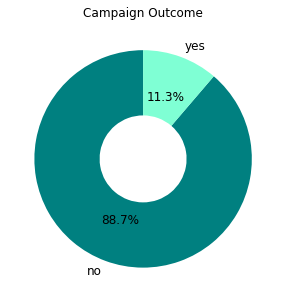

In [7]:
# Check the outcome of the campaign
campaign_outcome=data_df["outcome"].value_counts()
print(campaign_outcome)
plt.figure(figsize=(15,5))
plt.pie(campaign_outcome, labels=campaign_outcome.index, autopct='%1.1f%%', colors=['teal', 'aquamarine'],
       wedgeprops={'width': 0.6}, textprops={'fontsize': 12}, startangle=90)
plt.title("Campaign Outcome")

### Observations

- Out of all the telemarketing calls made to the potential customers, only 11.3% agreed to open term deposits. While a vast majority of 88.7% declined the offer.

##### Check the Categorical Variables with Bar Charts

In [8]:
# Create a function to plot the value counts
def value_counts(col, title, x_label, y_label):
    count=data_df[col].value_counts().sort_values(ascending=False)
    print(count)
    count.plot(kind="bar", figsize=(8,5), color=["salmon","blanchedalmond", "lightgreen"])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


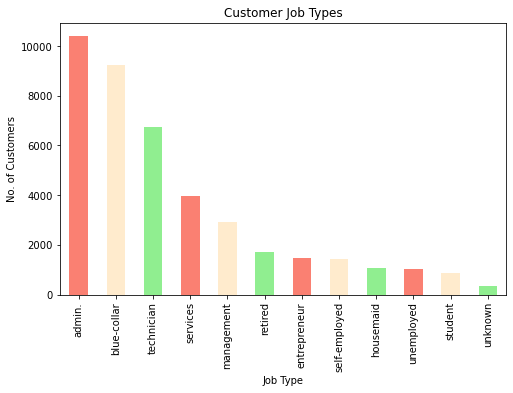

In [9]:
# Count Customer Jobs
value_counts("job", "Customer Job Types", "Job Type", "No. of Customers")

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64


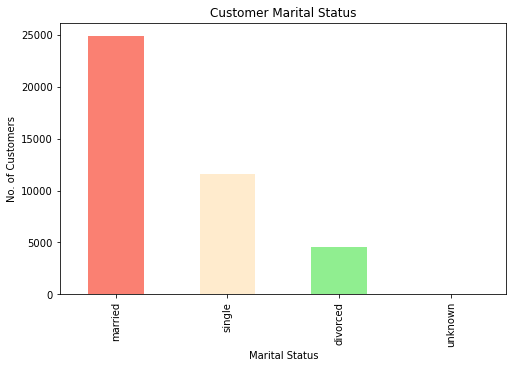

In [10]:
# Count Customer Marital Status
value_counts("marital", "Customer Marital Status", "Marital Status", "No. of Customers")

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64


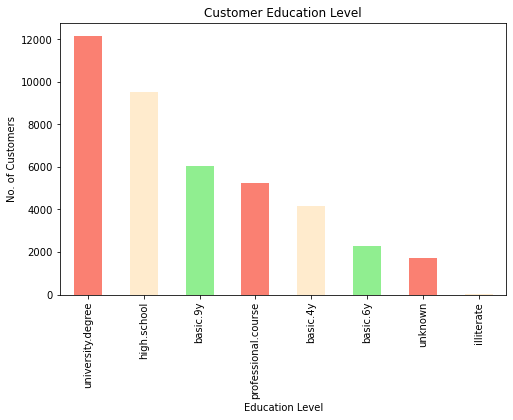

In [11]:
# Count the education of the targeted customers
value_counts("education", "Customer Education Level", "Education Level", "No. of Customers")

no         32577
unknown     8596
yes            3
Name: default, dtype: int64


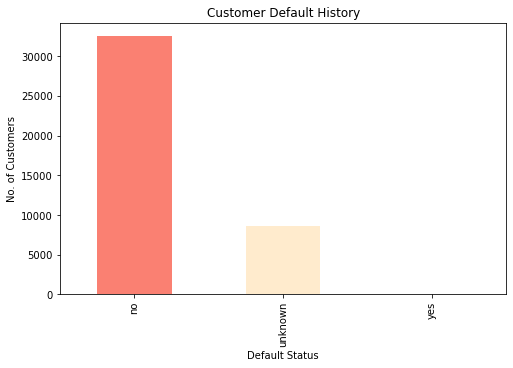

In [12]:
# Check if the customers have default history
value_counts("default", "Customer Default History", "Default Status", "No. of Customers")

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64


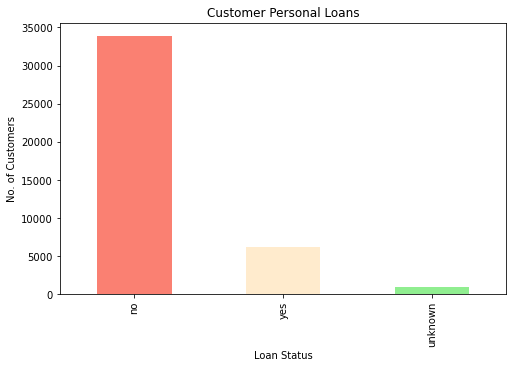

In [13]:
# Check the personal loan status of targeted customers
value_counts("loan", "Customer Personal Loans", "Loan Status", "No. of Customers")

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64


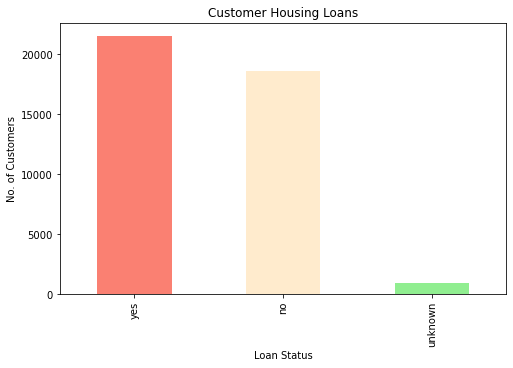

In [14]:
# Check the housing loan status of targeted customers
value_counts("housing", "Customer Housing Loans", "Loan Status", "No. of Customers")

cellular     26135
telephone    15041
Name: contact, dtype: int64


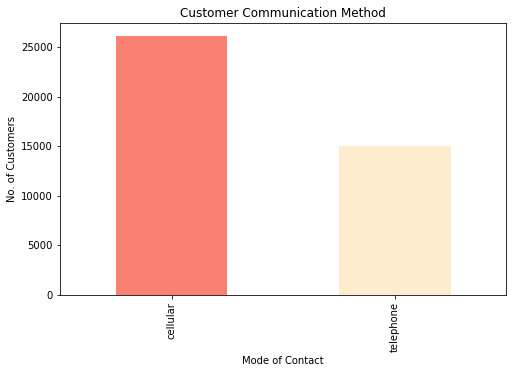

In [15]:
# Check the mode of communication for targeted customers
value_counts("contact", "Customer Communication Method", "Mode of Contact", "No. of Customers")

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64


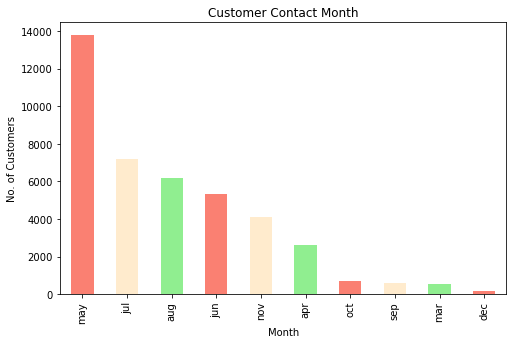

In [16]:
# Check the month of contacting targeted customers
value_counts("month", "Customer Contact Month", "Month", "No. of Customers")

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64


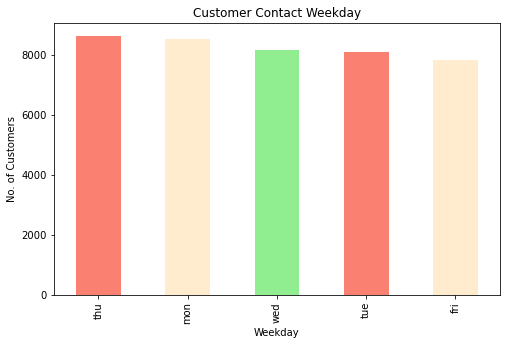

In [17]:
# Check the day of week when customers were contacted
value_counts("day_of_week", "Customer Contact Weekday", "Weekday", "No. of Customers")

nonexistent    35551
failure         4252
success         1373
Name: prev_outcome, dtype: int64


([<matplotlib.patches.Wedge at 0x22a7db7a880>,
 [Text(-1.0002430635682267, 0.45772678945376194, 'nonexistent'),
  Text(0.9468981842885608, -0.5598069565404016, 'failure'),
  Text(1.0939699766067499, -0.1150203907271543, 'success')],
 [Text(-0.5455871255826691, 0.24966915788387012, '86.3%'),
  Text(0.5164899187028512, -0.3053492490220372, '10.3%'),
  Text(0.5967108963309544, -0.06273839494208415, '3.3%')])

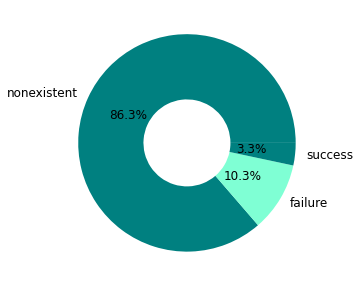

In [18]:
# Check the outcome of the previous campaign
previous_outcome=data_df["prev_outcome"].value_counts()
print(previous_outcome)
plt.figure(figsize=(15,5))
plt.pie(previous_outcome, labels= previous_outcome.index, autopct='%1.1f%%', colors=["teal", "aquamarine"],
       wedgeprops={'width': 0.6}, textprops={'fontsize': 12})

### Explore the numerical variables

<AxesSubplot:>

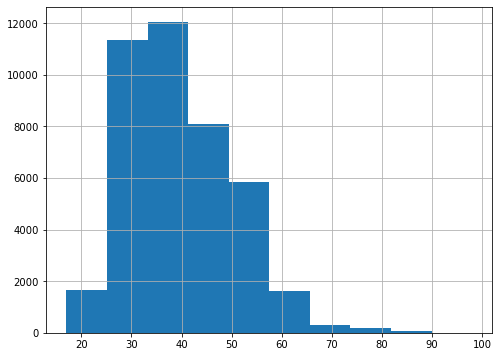

In [19]:
# Check the customer age distribution with histograms
data_df["age"].hist(figsize=(8,6))

In [20]:
# Check the age range of majority targeted customers
data_df.query('19 < age < 65').shape[0]/len(data_df["age"])

0.9821012240139887

31-50 years           26617
20 -30 years           7306
51-70 years            6757
71-80 years             302
more than 80 years      119
less than 20 years       75
Name: age_bracket, dtype: int64


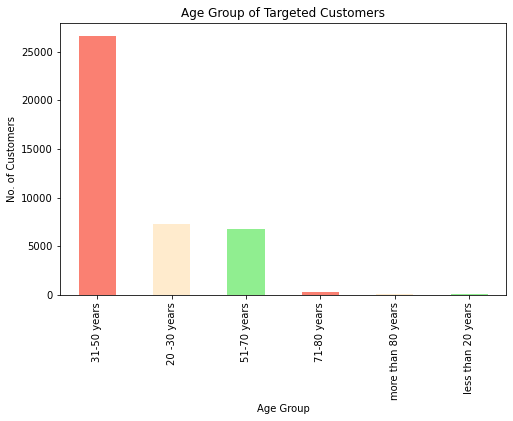

In [21]:
# Binning the age column 
bins=[0,19, 30, 50, 70, 80, 100]
labels=["less than 20 years", "20 -30 years", "31-50 years", "51-70 years", "71-80 years", "more than 80 years"]
data_df["age_bracket"]=pd.cut(data_df["age"], bins=bins, labels=labels, include_lowest=True)
value_counts("age_bracket", "Age Group of Targeted Customers", "Age Group", "No. of Customers")

<AxesSubplot:>

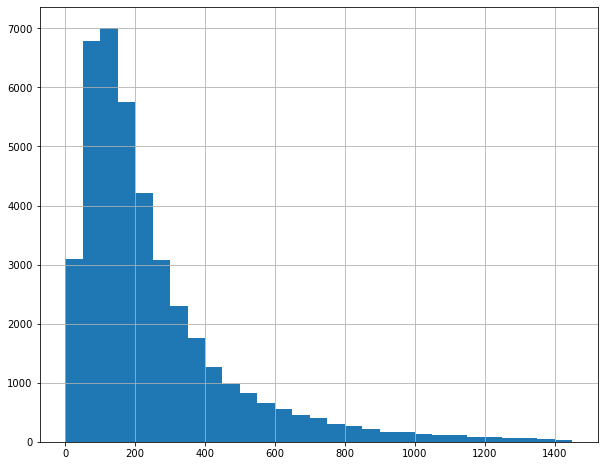

In [22]:
# Check the duration of the calls made with histogram
bins=np.arange(0,1500, 50)
data_df["duration"].hist(figsize=(10,8), bins=bins)

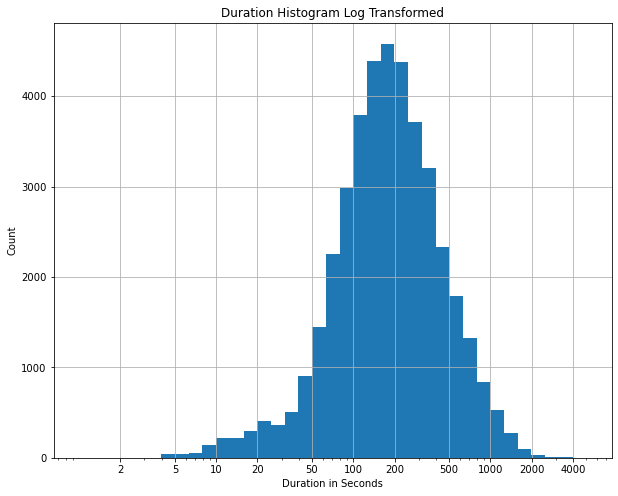

In [23]:
# Log transform the duration column to remove skewness and clearer picture
plt.figure(figsize=(10,8))
binsize=0.1
logbins=10**np.arange(0, np.log10(data_df["duration"].max()) + binsize, binsize)
plt.hist(data_df["duration"], bins=logbins)
plt.xscale('log')
plt.title("Duration Histogram Log Transformed")
plt.xlabel("Duration in Seconds")
plt.ylabel("Count")
tick_locs = [2, 5, 10, 20, 50, 100, 200, 500,  1000, 2000, 4000]
plt.xticks(tick_locs, tick_locs);
plt.grid();

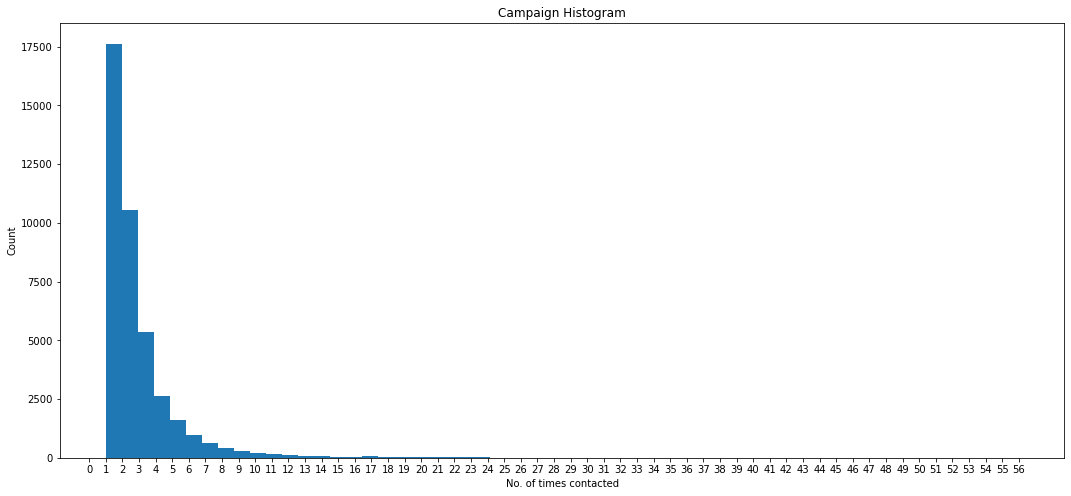

In [24]:
# Check the number of times customer was contacted for this campaign
plt.figure(figsize=(18,8))
plt.hist(data_df["campaign"], bins=57)
plt.title("Campaign Histogram")
plt.xlabel("No. of times contacted")
plt.ylabel("Count")
plt.xticks(range(0, 57))
plt.show()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64


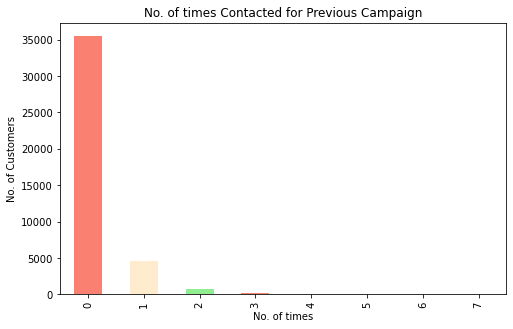

In [25]:
# Check how many times the customer was previously contacted
value_counts("previous", "No. of times Contacted for Previous Campaign", "No. of times", "No. of Customers")

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64


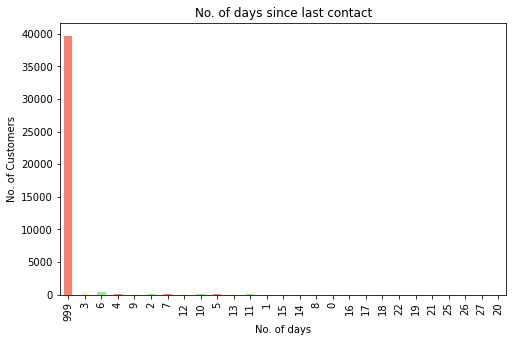

In [26]:
# Check when the customers were previously contacted
value_counts("pdays", "No. of days since last contact", "No. of days", "No. of Customers")

Text(0.5, 1.0, 'Employee Variation Rate')

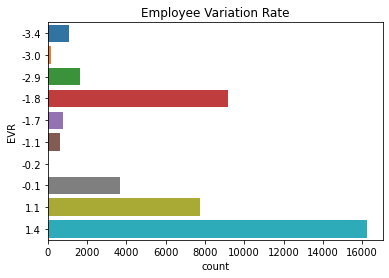

In [27]:
# Check the Employee Variation Rate Distribution
EVR_list=[x for x in data_df["EVR"].unique()]
sns.countplot(data=data_df, y="EVR" ,order=EVR_list.sort())
plt.title("Employee Variation Rate")

Text(0, 0.5, 'Count')

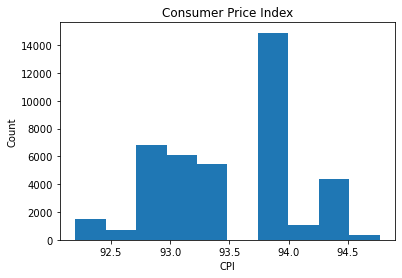

In [28]:
# Check the Consumer Price Index
plt.hist(data_df["CPI"])
plt.title("Consumer Price Index")
plt.xlabel("CPI")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

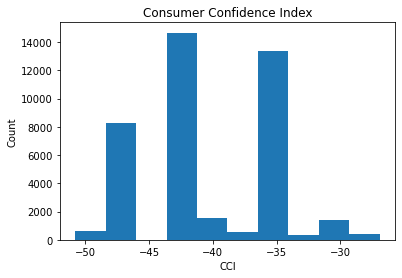

In [29]:
# Check the Consumer Confidence Index
plt.hist(data_df["CCI"])
plt.title("Consumer Confidence Index")
plt.xlabel("CCI")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

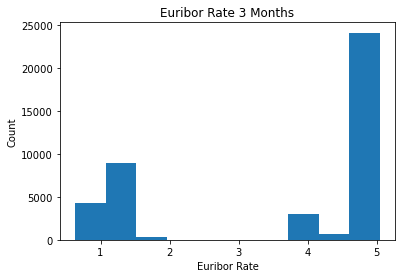

In [30]:
# Check the distribution of Euribor 3 month rate
plt.hist(data_df["euribor"])
plt.title("Euribor Rate 3 Months")
plt.xlabel("Euribor Rate")
plt.ylabel("Count")

In [31]:
# Replace "yes" and "no" in outcome column with 1 and 0
data_df["outcome"].replace({"yes": 1, "no":0}, inplace=True)

<AxesSubplot:>

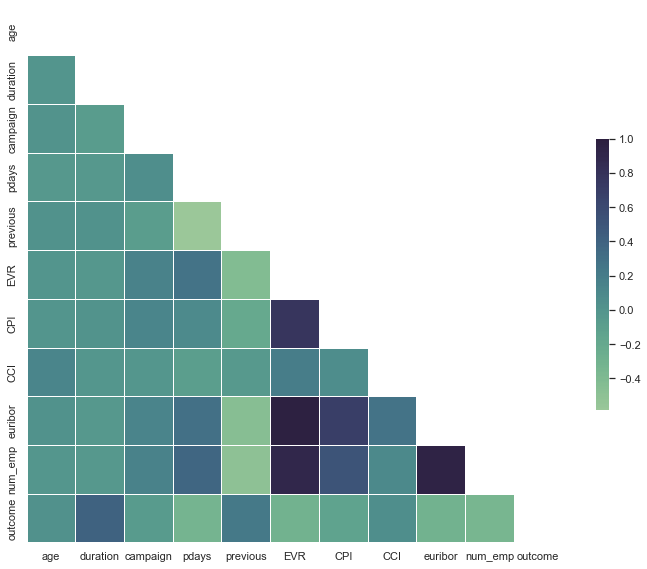

In [32]:
# Check the correlation between the numerical variables
num_var=["age", "duration", "campaign", "pdays", "previous", "EVR", "CPI", "CCI", "euribor", "num_emp", "outcome"]

sns.set_theme(style="white")

# Compute the correlation matrix
corrMatrix=data_df[num_var].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatrix, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 1.0, 'Correlation between Euribor and Number of Employees')

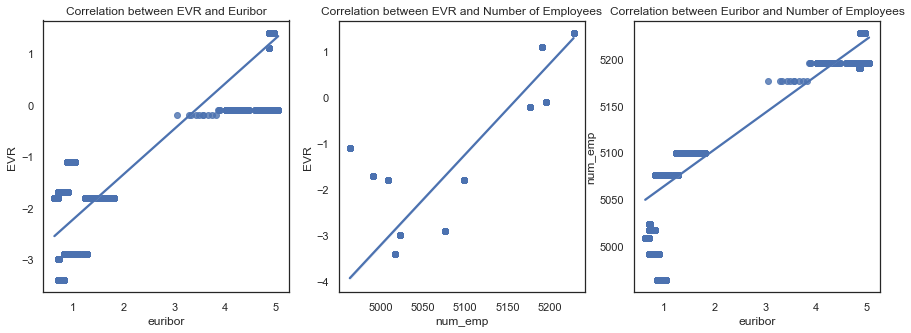

In [33]:
# Check the correlation between EVR, Euribor and Number of Employees

plt.figure(figsize=(15,5))
font={'fontsize': 13, 'family': 'sans'}

#1st plot: EVR vs Euribor
plt.subplot(1,3,1)
sns.regplot(data=data_df, x="euribor", y="EVR")
plt.title("Correlation between EVR and Euribor")

#2nd plot: EVR vs Number of Employees
plt.subplot(1,3,2)
sns.regplot(data=data_df, x="num_emp", y="EVR")
plt.title("Correlation between EVR and Number of Employees")


#3rd plot: Euribor vs Number of Employees
plt.subplot(1,3,3)
sns.regplot(data=data_df, x="euribor", y="num_emp")
plt.title("Correlation between Euribor and Number of Employees")

### Observations on Targeted Customers and Other Variables of Interest

- Campaign Outcome : Out of the total telemarketing calls made for this campaign, only 11.3% of the potential customers agreed to open term deposits. The vast majority of 88.7% declined the offer.

- Age : 98% of the targeted customers fall between an age range of 20 and 65. Customers between age range of 31-50 years were most heavily targeted for the campaign.

- Job : Majority of the targeted customers have admin, blue-collar or technician type jobs.

- Marital : Majority of the targeted customers are married.

- Education : Majority of the targeted customers have University degrees.

- Default : Majority of the targeted customers have no default history.

- Housing : Majority of the targeted customers do have current housing loans.

- Loan : Majority of the targeted customers do not have any personal loans.

- Contact : Majority of the targeted customers were targeted on cellular phones.

- Month : Majority of the targeted customers were contacted in the month of May.

- Day of week : The customers were mainly contacted on Mondays and Thursdays.

- Duration : The campaign call durations were between 50 and 800 seconds.

- Campaign : Many customers were contacted multiple times.

- pdays : Majority of the customers were contacted for the first time for the current campaign.
 
- poutcome : For the previous campaign, only 3.3% were successful, 10.3% failed and the rest was non-existent.

- EVR : Majority of the calls were made when the EVR was more than -0.2.

- Euribor : Majority of the calls were made when Euribor is greater than 3.5

- Correlation : There is a strong positive correlation between EVR, Euribor and Number of Employees. Particularly, EVR is always negative when Euribor is less than 3.

## Explore the Successful Campaign Requirements

In [34]:
# Create function to create crosstabulation between a variable and outcome and plot bar charts
def cross_tab_plot(var_1, var_2, title):
    cross_tab=pd.crosstab(data_df[var_1], data_df[var_2])
    cross_tab["total"]= cross_tab.iloc[:, 0] + cross_tab.iloc[:, 1]
    cross_tab["no_ratio"]=cross_tab.iloc[:, 0]/cross_tab["total"]
    cross_tab["yes_ratio"]= cross_tab.iloc[:, 1]/cross_tab["total"]
    cross_tab.iloc[:, 3:].plot(kind="bar", figsize=(15,6), color=["lightcoral", "turquoise"])
    plt.title(title)
    plt.xlabel(var_1)
    plt.ylabel("Count")
    plt.show()

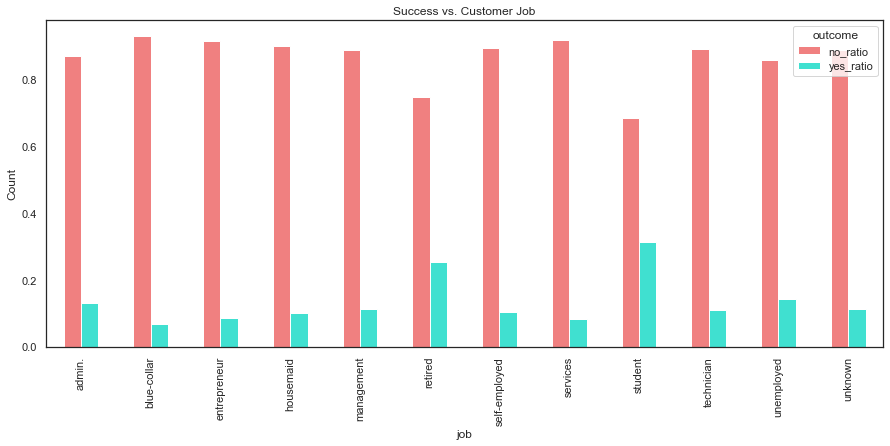

In [35]:
# Check success ratio with customer job
cross_tab_plot("job", "outcome", "Success vs. Customer Job")

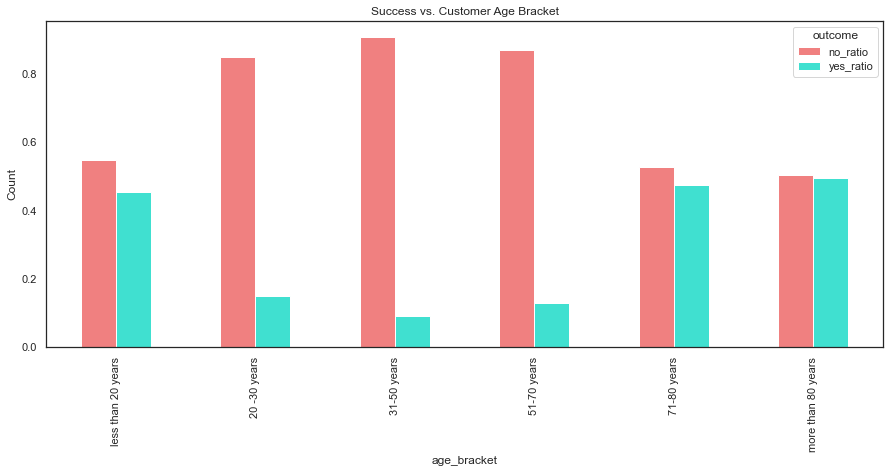

In [36]:
#Check success with customer age bracket
cross_tab_plot("age_bracket", "outcome", "Success vs. Customer Age Bracket")

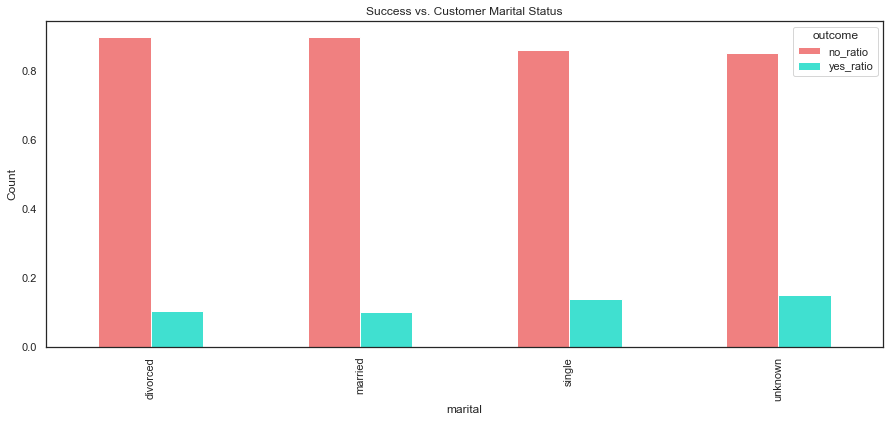

In [37]:
# Check success with customer marital status
cross_tab_plot("marital", "outcome", "Success vs. Customer Marital Status")

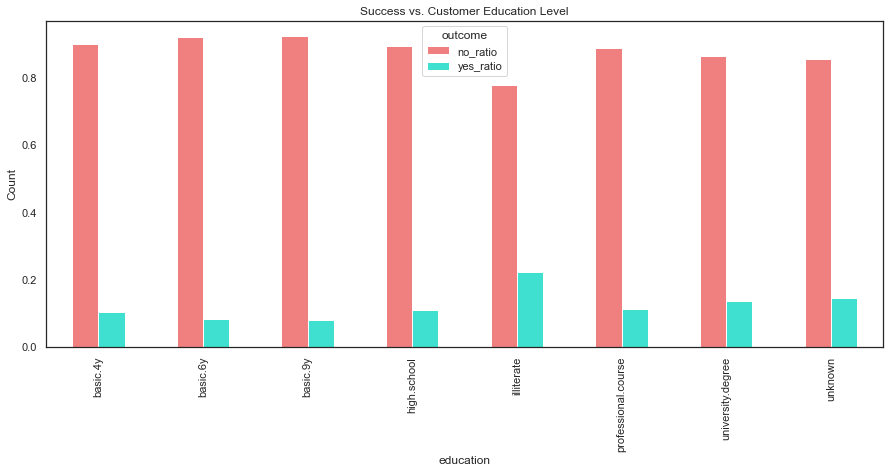

In [38]:
# Check success with customer education level
cross_tab_plot("education", "outcome", "Success vs. Customer Education Level")

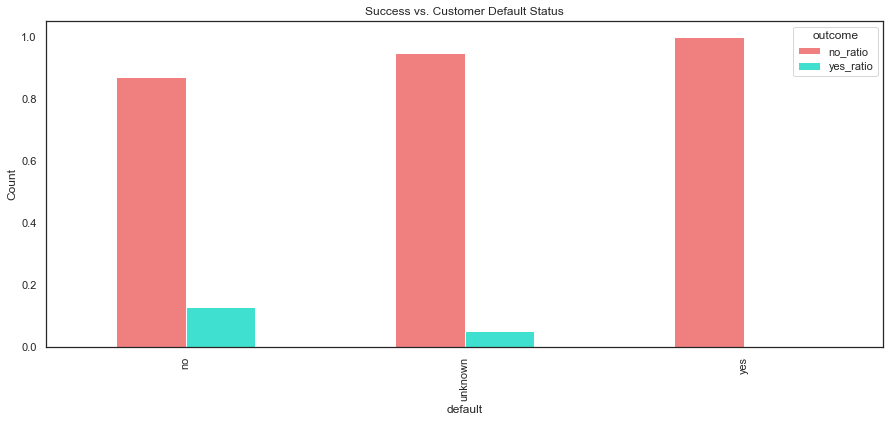

In [39]:
# Check success by Customer Deafault Status
cross_tab_plot("default", "outcome", "Success vs. Customer Default Status")

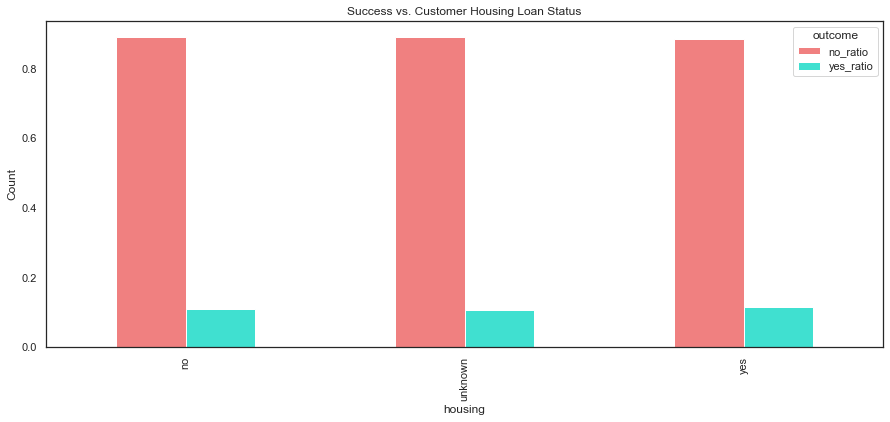

In [40]:
# Check Success by Customer Housing Loan Status
cross_tab_plot("housing", "outcome", "Success vs. Customer Housing Loan Status")

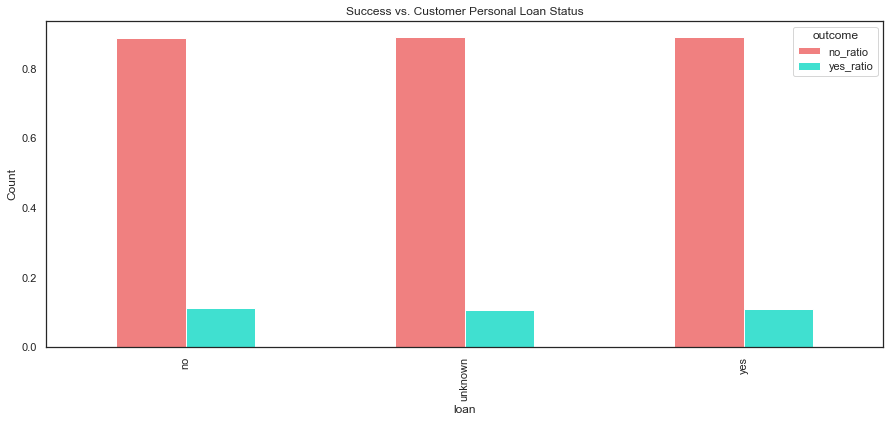

In [41]:
# Check success by Customer Personal Loan Status
cross_tab_plot("loan", "outcome", "Success vs. Customer Personal Loan Status")

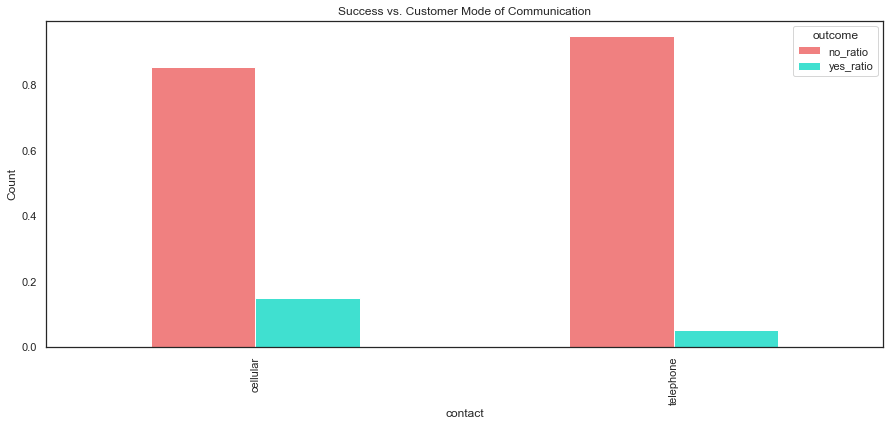

In [42]:
# Check success by mode of communication
cross_tab_plot("contact", "outcome", "Success vs. Customer Mode of Communication")

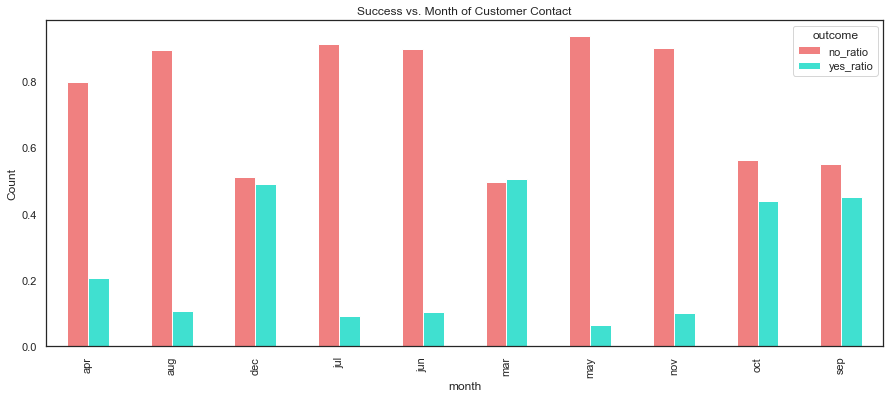

In [43]:
# Check success by month of contact
cross_tab_plot("month", "outcome", "Success vs. Month of Customer Contact")

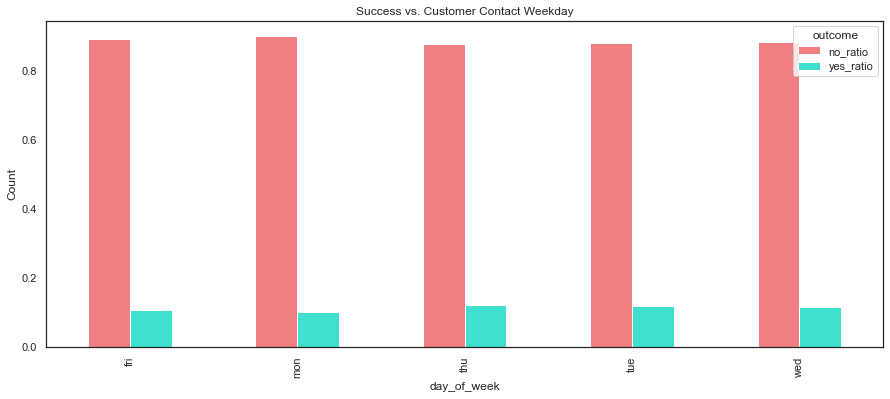

In [44]:
# Check success by weekday of contact
cross_tab_plot("day_of_week", "outcome", "Success vs. Customer Contact Weekday")

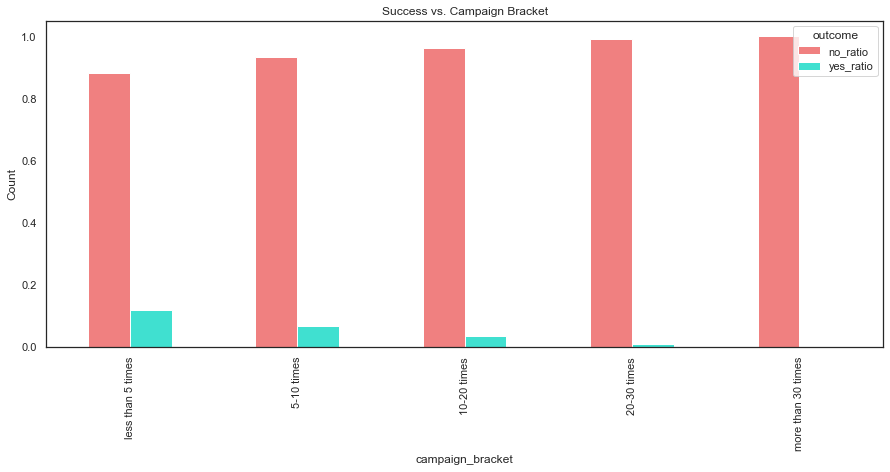

In [45]:
# Bin the campaign column which shows how many times the customer was contacted for the campaign
bins=[0, 4, 10, 20, 30, 50]
labels=["less than 5 times", "5-10 times", "10-20 times", "20-30 times", "more than 30 times"]
data_df["campaign_bracket"]=pd.cut(data_df["campaign"], bins=bins, labels=labels, include_lowest=True)

#Check success by campaign brcaket
cross_tab_plot("campaign_bracket", "outcome", "Success vs. Campaign Bracket")

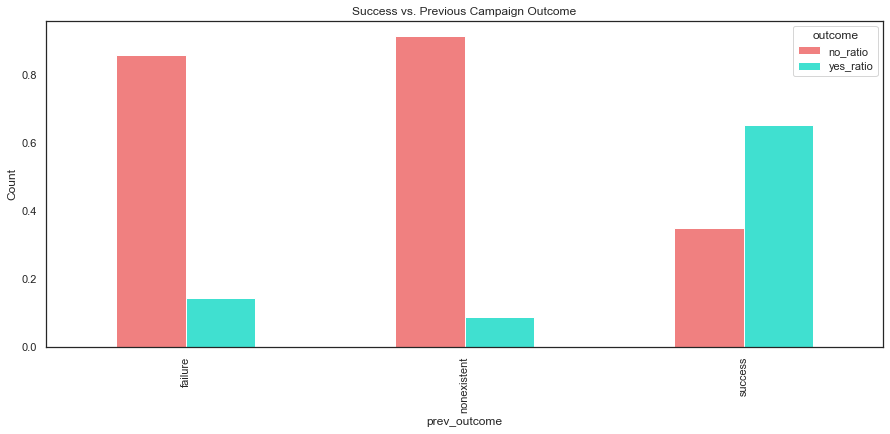

In [46]:
#Check success by previous outcome
cross_tab_plot("prev_outcome", "outcome", "Success vs. Previous Campaign Outcome")

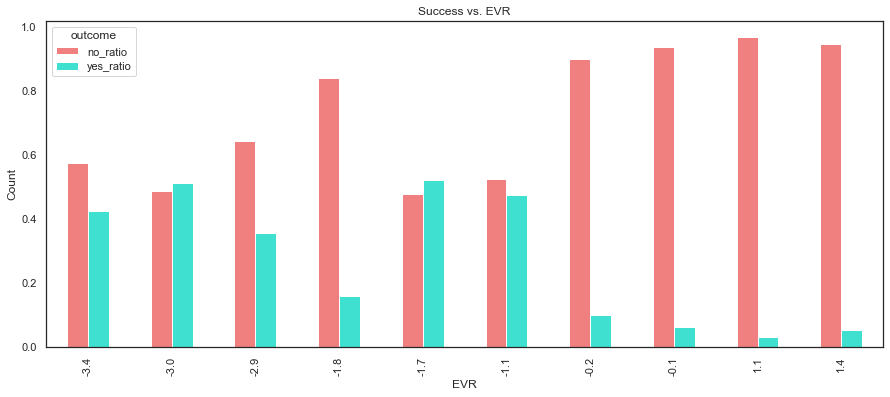

In [47]:
# Check success by EVR
cross_tab_plot("EVR", "outcome", "Success vs. EVR")

Text(0.5, 1.0, 'Success Ratio when Euribor less than 2')

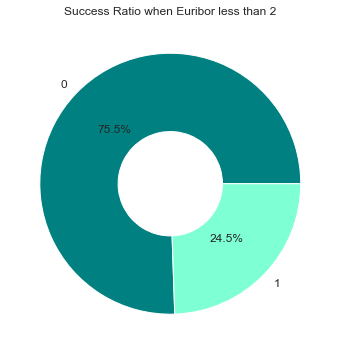

In [48]:
# Explore the success and failure ratio while euribor is less than 2

data_sub=data_df.query('euribor<2')
ratio=data_sub["outcome"].value_counts()
plt.figure(figsize=(15,6))
plt.pie(ratio, labels=ratio.index, autopct='%1.1f%%', colors=["teal", "aquamarine"],
       wedgeprops={'width': 0.6}, textprops={'fontsize': 12})
plt.title("Success Ratio when Euribor less than 2")

### Characterics of Campaign Success

- Job : Customers who are students or retired mostly agreed to open term deposits.

- Age : Customers who are less than 20 years old and customers more than 70 years old said agreed to open term deposits.

- Marital : Single Customers are more likely to open term deposits.

- Education : Illiterate customers mostly agreed to the campaign.

- Month : Customers contacted in March, October, September and December mostly agreed to open term deposits.

- Weekday : Customers contacted on Tuesdays, Wednesdays and Thursdays agreed to the campaign.

- Campaign : As the no. of calls increased for the campaign, the success ratio decreased. Most of the successful customers received just one call for the campaign.

- Previous Outcome : Customers who agreed to previous campaigns, are more likely to agree to the current one. This is a significant ratio and should be considered by the bank.

- EVR and Euribor : We have previously established that there is a strong correlation between EVR and Euribor. It was found that success ratio was much higher when EVR is negative and Euribor 3 month rate is less than 2.

## Preparing the data for modelling

In [49]:
# Prepare a copy of the original dataframe
data_ml=data_df.copy()

In [50]:
# Drop the age column and campaign 
data_ml.drop(columns=["age", "campaign","num_emp", "CCI"], axis=1, inplace=True)

In [51]:
# Check the final data columns
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   job               41176 non-null  object  
 1   marital           41176 non-null  object  
 2   education         41176 non-null  object  
 3   default           41176 non-null  object  
 4   housing           41176 non-null  object  
 5   loan              41176 non-null  object  
 6   contact           41176 non-null  object  
 7   month             41176 non-null  object  
 8   day_of_week       41176 non-null  object  
 9   duration          41176 non-null  int64   
 10  pdays             41176 non-null  int64   
 11  previous          41176 non-null  int64   
 12  prev_outcome      41176 non-null  object  
 13  EVR               41176 non-null  float64 
 14  CPI               41176 non-null  float64 
 15  euribor           41176 non-null  float64 
 16  outcome           4117

In [52]:
# Format the education column
list=["basic.4y", "basic.6y", "basic.9y"]
for i in list:
    data_ml.loc[data_ml["education"]==i, "education"]  = "middle.school"
data_ml["education"].value_counts()

middle.school          12512
university.degree      12164
high.school             9512
professional.course     5240
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [53]:
# Format the pdays column
data_ml.loc[data_ml["pdays"]==999, "pdays"]=0

In [54]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   job               41176 non-null  object  
 1   marital           41176 non-null  object  
 2   education         41176 non-null  object  
 3   default           41176 non-null  object  
 4   housing           41176 non-null  object  
 5   loan              41176 non-null  object  
 6   contact           41176 non-null  object  
 7   month             41176 non-null  object  
 8   day_of_week       41176 non-null  object  
 9   duration          41176 non-null  int64   
 10  pdays             41176 non-null  int64   
 11  previous          41176 non-null  int64   
 12  prev_outcome      41176 non-null  object  
 13  EVR               41176 non-null  float64 
 14  CPI               41176 non-null  float64 
 15  euribor           41176 non-null  float64 
 16  outcome           4117

In [55]:
# Use Standard Scaler on the numeric variables
num_var=["duration", "pdays", "previous", "EVR", "CPI", "euribor"]

#Instantiate the scaler
data_scaler=StandardScaler()

#Scale the numeric columns
data_ml[num_var]=data_scaler.fit_transform(data_ml[num_var])


In [56]:
# Use get_dummies() to create variables for text features.
cat_cols=["job", "marital", "education", "housing", "loan", "contact",
                                        "month", "day_of_week", "prev_outcome", "age_bracket","campaign_bracket","default"]
encode_df=pd.get_dummies(data_ml, columns= cat_cols)
                           

In [57]:
encode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 69 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   duration                             41176 non-null  float64
 1   pdays                                41176 non-null  float64
 2   previous                             41176 non-null  float64
 3   EVR                                  41176 non-null  float64
 4   CPI                                  41176 non-null  float64
 5   euribor                              41176 non-null  float64
 6   outcome                              41176 non-null  int64  
 7   job_admin.                           41176 non-null  uint8  
 8   job_blue-collar                      41176 non-null  uint8  
 9   job_entrepreneur                     41176 non-null  uint8  
 10  job_housemaid                        41176 non-null  uint8  
 11  job_management              

In [58]:
# Split the data into training and testing sets
X=encode_df.drop("outcome", axis=1)
y=encode_df["outcome"]

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1, stratify=y)

In [59]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Logistic Regression

In [60]:
classifier = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)

#Train the data
classifier.fit(X_train, y_train)

#Predict outcomes for test dataset
y_pred=classifier.predict(X_test)
results=pd.DataFrame({"Prediction" : y_pred, "Actual" : y_test}).reset_index(drop=True)


C:\Users\SUKANYA GHOSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
#Create a dataframe from the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)

#Create a dataframe from the Confusion Matrix
cm_df=pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns= ["Predicted 0", "Predicted 1"])


In [62]:
# Print the Confusion Matrix and  Classification Report
print("Accuracy Score")
print(accuracy_score(y_test, y_pred))
print ("Confusion Matrix")
display(cm_df)
print("Classification Report")
print(classification_report(y_test,y_pred))

Accuracy Score
0.9133475811152127
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,8913,221
Actual 1,671,489


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9134
           1       0.69      0.42      0.52      1160

    accuracy                           0.91     10294
   macro avg       0.81      0.70      0.74     10294
weighted avg       0.90      0.91      0.90     10294



### RandomOversampling - Logistic Regression

In [63]:
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

#Count the resampled class
Counter(y_resampled)

Counter({1: 27403, 0: 27403})

In [64]:
#Train the resampled data with Logistic Regression
lr_model = LogisticRegression(solver='lbfgs', random_state=1)
lr_model.fit(X_resampled, y_resampled)

#Predict outcomes for test dataset
y_pred=lr_model.predict(X_test)
results=pd.DataFrame({"Prediction" : y_pred, "Actual" : y_test}).reset_index(drop=True)

C:\Users\SUKANYA GHOSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
#Create a dataframe from the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)

#Create a dataframe from the Confusion Matrix
cm_df=pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns= ["Predicted 0", "Predicted 1"])

In [66]:
# Print the Confusion Matrix and  Classification Report
print("Accuracy Score")
print(balanced_accuracy_score(y_test, y_pred))
print ("Confusion Matrix")
display(cm_df)
print("Classification Report")
print(classification_report_imbalanced(y_test,y_pred))

Accuracy Score
0.8651950272947608
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,7884,1250
Actual 1,154,1006


Classification Report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.86      0.87      0.92      0.87      0.75      9134
          1       0.45      0.87      0.86      0.59      0.87      0.75      1160

avg / total       0.92      0.86      0.87      0.88      0.87      0.75     10294



### Synthetic Minority Oversampling Technique (SMOTE) - Logistic Regression

In [67]:
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)

#Count the resampled class
Counter(y_resampled)

Counter({1: 27403, 0: 27403})

In [68]:
#Train the resampled data with Logistic Regression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

#Predict the data
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

#Create the confusion matrix
cm=confusion_matrix(y_test, y_pred)
#Create a dataframe from the Confusion Matrix
cm_df=pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns= ["Predicted 0", "Predicted 1"])

#Print the classification Report
print("Accuracy Score")
print(balanced_accuracy_score(y_test, y_pred))
print("Confusion Matrix")
print(cm_df)
print(classification_report_imbalanced(y_test, y_pred))

Accuracy Score
0.7214679144990676
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0         8849          285
Actual 1          610          550
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.97      0.47      0.95      0.68      0.48      9134
          1       0.66      0.47      0.97      0.55      0.68      0.44      1160

avg / total       0.90      0.91      0.53      0.91      0.68      0.48     10294



C:\Users\SUKANYA GHOSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Undersampling - Logistic Regression

In [69]:
#Undersample the majority class with imblearn library
ros = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 3479, 1: 3479})

In [70]:
#Train the data with Logistic Regression Model
und_model = LogisticRegression(solver='lbfgs', random_state=1)
und_model.fit(X_resampled, y_resampled)

#Predict outcomes for test dataset
y_pred=und_model.predict(X_test)
results=pd.DataFrame({"Prediction" : y_pred, "Actual" : y_test}).reset_index(drop=True)

C:\Users\SUKANYA GHOSH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
#Create a dataframe from the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)

#Create a dataframe from the Confusion Matrix
cm_df=pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns= ["Predicted 0", "Predicted 1"])

In [72]:
# Print the Confusion Matrix and  Classification Report
print("Accuracy Score")
print(balanced_accuracy_score(y_test, y_pred))
print ("Confusion Matrix")
display(cm_df)
print("Classification Report")
print(classification_report_imbalanced(y_test,y_pred))

Accuracy Score
0.8678153054521568
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,7861,1273
Actual 1,145,1015


Classification Report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.86      0.88      0.92      0.87      0.75      9134
          1       0.44      0.88      0.86      0.59      0.87      0.75      1160

avg / total       0.92      0.86      0.87      0.88      0.87      0.75     10294



### Support Vector Classifier

In [73]:
sv_clf=SVC(gamma='auto', random_state=175)

# #Train the data
sv_clf.fit(X_train, y_train)

# #Predict outcomes for test dataset
y_pred=sv_clf.predict(X_test)
results=pd.DataFrame({"Prediction" : y_pred, "Actual" : y_test}).reset_index(drop=True)


In [74]:
#Create a dataframe from the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)

# #Create a dataframe from the Confusion Matrix
cm_df=pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns= ["Predicted 0", "Predicted 1"])

In [75]:
#Print the Confusion Matrix and  Classification Report
print("Accuracy Score")
print(accuracy_score(y_test, y_pred))
print ("Confusion Matrix")
display(cm_df)
print("Classification Report")
print(classification_report(y_test,y_pred))

Accuracy Score
0.9106275500291432
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,8975,159
Actual 1,761,399


Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9134
           1       0.72      0.34      0.46      1160

    accuracy                           0.91     10294
   macro avg       0.82      0.66      0.71     10294
weighted avg       0.90      0.91      0.90     10294



### Random Forest Classifier

In [76]:
#Create a Random Forest Classifier
rf_model=RandomForestClassifier(n_estimators=500,random_state=78)

#Fitting the model
rf_model=rf_model.fit(X_train, y_train)

#Predict outcomes for test dataset
y_pred=rf_model.predict(X_test)
results=pd.DataFrame({"Prediction" : y_pred, "Actual" : y_test}).reset_index(drop=True)


In [77]:
#Create a dataframe from the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)

#Create a dataframe from the Confusion Matrix
cm_df=pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns= ["Predicted 0", "Predicted 1"])

In [78]:
# Print the Confusion Matrix and  Classification Report
print("Accuracy Score")
print(accuracy_score(y_test, y_pred))
print ("Confusion Matrix")
display(cm_df)
print("Classification Report")
print(classification_report(y_test,y_pred))

Accuracy Score
0.9148047406256071
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,8877,257
Actual 1,620,540


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9134
           1       0.68      0.47      0.55      1160

    accuracy                           0.91     10294
   macro avg       0.81      0.72      0.75     10294
weighted avg       0.91      0.91      0.91     10294



### Gradient Boosting Classifier


In [79]:
gb_model=GradientBoostingClassifier(random_state=1)

#Fitting the model
gb_model=gb_model.fit(X_train, y_train)

#Predict outcomes for test dataset
y_pred=gb_model.predict(X_test)
results=pd.DataFrame({"Prediction" : y_pred, "Actual" : y_test}).reset_index(drop=True)


In [80]:
#Create a dataframe from the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)

#Create a dataframe from the Confusion Matrix
cm_df=pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns= ["Predicted 0", "Predicted 1"])

In [81]:
# Print the Confusion Matrix and  Classification Report
print("Accuracy Score")
print(accuracy_score(y_test, y_pred))
print ("Confusion Matrix")
display(cm_df)
print("Classification Report")
print(classification_report(y_test,y_pred))

Accuracy Score
0.9183019234505537
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,8851,283
Actual 1,558,602


Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      9134
           1       0.68      0.52      0.59      1160

    accuracy                           0.92     10294
   macro avg       0.81      0.74      0.77     10294
weighted avg       0.91      0.92      0.91     10294



### AdaBoost Classifier

In [82]:
ab_model=AdaBoostClassifier(random_state=1)

#Fitting the model
ab_model=ab_model.fit(X_train, y_train)

#Predict outcomes for test dataset
y_pred=ab_model.predict(X_test)
results=pd.DataFrame({"Prediction" : y_pred, "Actual" : y_test}).reset_index(drop=True)


In [83]:
#Create a dataframe from the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)

#Create a dataframe from the Confusion Matrix
cm_df=pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns= ["Predicted 0", "Predicted 1"])

In [84]:
# Print the Confusion Matrix and  Classification Report
print("Accuracy Score")
print(accuracy_score(y_test, y_pred))
print ("Confusion Matrix")
display(cm_df)
print("Classification Report")
print(classification_report(y_test,y_pred))

Accuracy Score
0.9089761025840295
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,8924,210
Actual 1,727,433


Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9134
           1       0.67      0.37      0.48      1160

    accuracy                           0.91     10294
   macro avg       0.80      0.68      0.72     10294
weighted avg       0.90      0.91      0.90     10294



In [85]:
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

#Count the resampled class
Counter(y_resampled)

Counter({1: 27403, 0: 27403})

## K-Nearest Neighbors

In [86]:
knn_model=KNeighborsClassifier()

#Fitting the model
knn_model=knn_model.fit(X_train, y_train)

#Predict outcomes for test dataset
y_pred=knn_model.predict(X_test)
results=pd.DataFrame({"Prediction" : y_pred, "Actual" : y_test}).reset_index(drop=True)


In [87]:
#Create a dataframe from the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)

#Create a dataframe from the Confusion Matrix
cm_df=pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns= ["Predicted 0", "Predicted 1"])

In [88]:
# Print the Confusion Matrix and  Classification Report
print("Accuracy Score")
print(accuracy_score(y_test, y_pred))
print ("Confusion Matrix")
display(cm_df)
print("Classification Report")
print(classification_report(y_test,y_pred))

Accuracy Score
0.9028560326403731
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,8832,302
Actual 1,698,462


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9134
           1       0.60      0.40      0.48      1160

    accuracy                           0.90     10294
   macro avg       0.77      0.68      0.71     10294
weighted avg       0.89      0.90      0.89     10294

